
# Project: Investigate the show up at the appointment of patients



In [209]:
# Set up import statements for all of the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [210]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [211]:
# view dimensions of dataset
df.shape

(110527, 14)

In [212]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [213]:
# check the row has min age =-1 of dataset
df_age_min = df.query('Age =="-1"')
df_age_min

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [214]:
# view info and check missing value for each feature 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [215]:
# checks if any of rows in dataset have duplicated values
sum(df.duplicated())

0



### Data Cleaning

In [216]:
# replace dash with underscores and lowercase labels for dataset
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

# confirm changes
df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [217]:
# just get data have age larger or equal 0 from dataset
df = df.query('age >= 0')

# confirm changes
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [218]:
# drop 4 columns from dataset
df.drop(['patientid', 'appointmentid', 'scheduledday', 'appointmentday'], axis=1, inplace=True)

# confirm changes
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c1cf1a400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4c1d0e9e48>]], dtype=object)

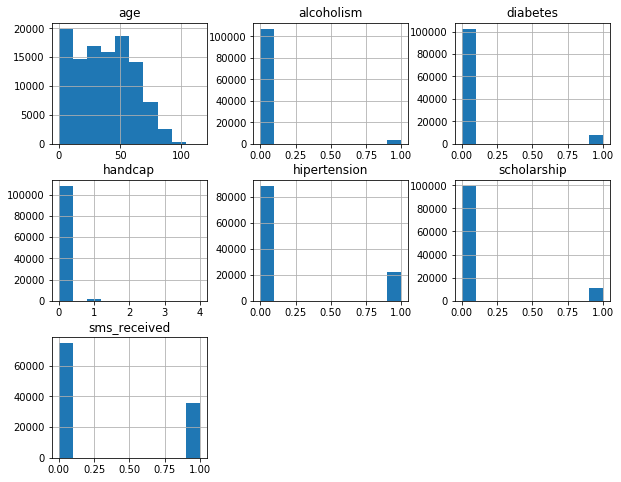

In [219]:
df.hist(figsize=(10,8))

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Is different gender associated with show or not?)

In [220]:
# Find the value counts of each gender (M and F) with groupby
df.groupby('gender')['no_show'].value_counts()


gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

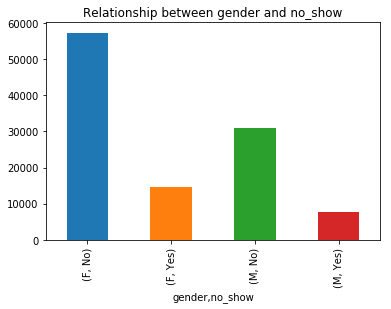

In [221]:
# View the histogram of value counts of each gender (M and F) with groupby
df.groupby('gender')['no_show'].value_counts().plot(kind='bar', title='Relationship between gender and no_show')

In [222]:
#The no_show column says "No" if the patient showed up to their appointment, and "Yes" if they did not show up.
df_show = df.query('no_show == "No"')
df_no_show = df.query('no_show == "Yes"')

In [223]:
#The proportion of showed up patients
pro_show = df_show['gender'].value_counts()/df['gender'].value_counts()
pro_show

F    0.796851
M    0.800321
Name: gender, dtype: float64

In [224]:
#The proportion of not showed up patients
pro_no_show = df_no_show['gender'].value_counts()/df['gender'].value_counts()
pro_no_show

F    0.203149
M    0.199679
Name: gender, dtype: float64

Text(0.5,1,'Proportion of female patient')

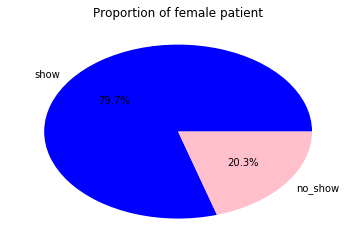

In [225]:
# View the histogram of the proportion of Female patients
plt.pie(x=np.array([0.796851, 0.203149]), labels = ['show', 'no_show'], colors =['blue', 'pink'],autopct = '%1.1f%%')
plt.title('Proportion of female patient')


Text(0.5,1,'Proportion of male patient')

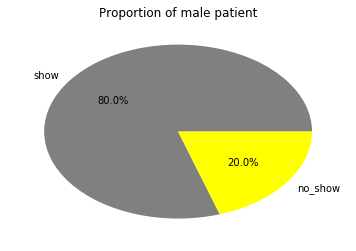

In [226]:
# View the histogram of the proportion of Male patients
plt.pie(x=np.array([0.800321, 0.199679]), labels = ['show', 'no_show'], colors =['gray', 'yellow'], autopct = '%1.1f%%')
plt.title('Proportion of male patient')

### Research Question 2 (Which group of patients has the most showing up at their appointments?)

In [227]:
# View the min, 25%, 50%, 75%, max age with Pandas describe
df.describe().age

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [228]:
df_show.describe().age

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

Text(0.5,1,'The age of showed up patients')

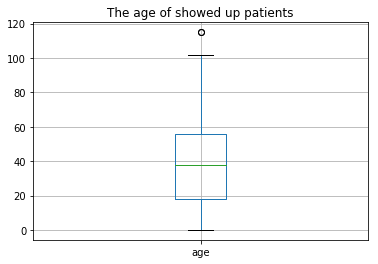

In [229]:
# View the histogram of showed up patient's age
df_show.boxplot(column =['age'])
plt.title('The age of showed up patients')

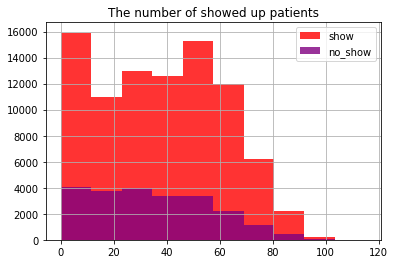

In [230]:
df_show.age.hist(alpha = 0.8, color='red', label='show')
df_no_show.age.hist(alpha = 0.8, color='purple', label='no_show')
plt.title('The number of showed up patients')
plt.legend();
                    

In [231]:
# Use query to select each group and get its counts
children = df_show.query('age <= 10')
teenagers = df_show.query('age <= 17')
young_adults = df.query('age <= 35')
adults = df.query('age <= 60')
old = df.query('age > 60')

child_show_count = children['age'].count()
teen_show_count = teenagers['age'].count()
young_show_count = young_adults['age'].count()
adult_show_count = adults['age'].count()
old_show_count = old['age'].count()

df_show_count = df_show['age'].count()


In [232]:
#The proportion of each group patients who showed up at the appointments
children_show = child_show_count/df_show_count
teen_show = teen_show_count/df_show_count
young_show = young_show_count/df_show_count
adult_show = adult_show_count/df_show_count
old_show = old_show_count/df_show_count
(children_show, teen_show, young_show, adult_show, old_show)

(0.16961238903941864,
 0.24240706519890712,
 0.60089335313523873,
 1.0289886290203725,
 0.22404117587039576)

Text(0.5,1,'Proportion of showed up patient groups')

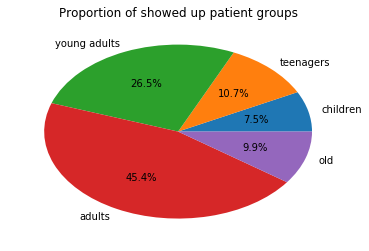

In [233]:
# View the histogram of the proportion of each group patients who showed up at the appointments
plt.pie(x=np.array([children_show, teen_show, young_show, adult_show, old_show]), labels = ['children', 'teenagers', 'young adults', 'adults', 'old'], autopct = '%1.1f%%')
plt.title('Proportion of showed up patient groups')

### Research Question 3 (Will diabetes man or woman show up at the appointments?)

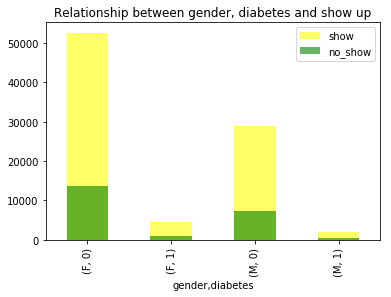

In [234]:
# View the histogram of the relationship between gender, diabetes and showed up or not at the appointment
df_show.groupby('gender')['diabetes'].value_counts().plot(kind ='bar', alpha=0.6, color='yellow', label='show')
df_no_show.groupby('gender')['diabetes'].value_counts().plot(kind ='bar', alpha=0.6, color='green', label='no_show')
plt.title('Relationship between gender, diabetes and show up')
plt.legend();

### Research Question 4 (Are the gender and alcoholism associated with showing or not?)

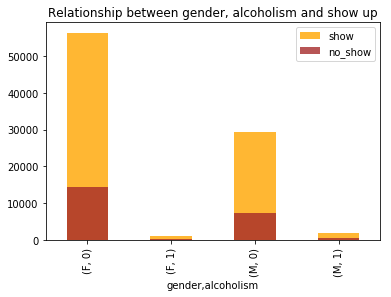

In [235]:
# View the histogram of the relationship between gender, alcoholism and showed up or not at the appointment
df_show.groupby('gender')['alcoholism'].value_counts().plot(kind ='bar', alpha=0.8, color='orange', label='show')
df_no_show.groupby('gender')['alcoholism'].value_counts().plot(kind ='bar', alpha=0.8, color='brown', label='no_show')
plt.title('Relationship between gender, alcoholism and show up')
plt.legend();


In [236]:
# Calculate the proportion of alcohol and none-alcohol female patients who showed up at the appointments
df_show_fe = df_show.query('gender == "F"')
alco_fe = df_show_fe.query('alcoholism == 1')
alco_fe_prop = alco_fe['gender'].count()/df_show['gender'].count()
no_alco_fe = df_show_fe.query('alcoholism == 0')
no_alco_fe_prop = no_alco_fe['gender'].count()/df_show['gender'].count()

In [237]:
# Calculate the proportion of alcohol and none-alcohol male patients who showed up at the appointments
df_show_ma = df_show.query('gender == "M"')
alco_ma = df_show_ma.query('alcoholism == 1')
alco_ma_prop = alco_ma['gender'].count()/df_show['gender'].count()
no_alco_ma = df_show_ma.query('alcoholism == 0')
no_alco_ma_prop = no_alco_ma['gender'].count()/df_show['gender'].count()

Text(0.5,1,'Proportion of showed up patients')

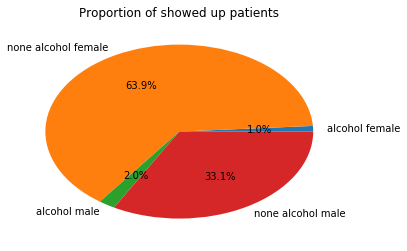

In [238]:
# View the histogram of the proportion of each gender patients who has alcoholism and showed up at the appointments
plt.pie(x=np.array([alco_fe_prop, no_alco_fe_prop, alco_ma_prop, no_alco_ma_prop]), labels = ['alcohol female', 'none alcohol female', 'alcohol male', 'none alcohol male'], autopct = '%1.1f%%')
plt.title('Proportion of showed up patients')

In [239]:
# Calculate the proportion of alcohol and none-alcohol female patients who didn't show up at the appointments
df_no_s_fe = df_no_show.query('gender == "F"')
no_s_alco_fe = df_no_s_fe.query('alcoholism == 1')
no_s_alco_fe_prop = no_s_alco_fe['gender'].count()/df_no_show['gender'].count()
no_s_no_alco_fe = df_no_s_fe.query('alcoholism == 0')
no_s_no_alco_fe_prop = no_s_no_alco_fe['gender'].count()/df_no_show['gender'].count()

In [240]:
# Calculate the proportion of alcohol and none-alcohol male patients who didn't show up at the appointments
df_no_s_ma = df_no_show.query('gender == "M"')
no_s_alco_ma = df_no_s_ma.query('alcoholism == 1')
no_s_alco_ma_prop = no_s_alco_ma['gender'].count()/df_no_show['gender'].count()
no_s_no_alco_ma = df_no_s_ma.query('alcoholism == 0')
no_s_no_alco_ma_prop = no_s_no_alco_ma['gender'].count()/df_no_show['gender'].count()

Text(0.5,1,'Proportion of no showed up patients')

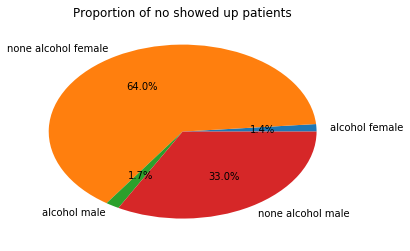

In [241]:
# View the histogram of the proportion of each gender patients who has alcoholism and showed up at the appointments
plt.pie(x=np.array([no_s_alco_fe_prop, no_s_no_alco_fe_prop, no_s_alco_ma_prop, no_s_no_alco_ma_prop]), labels = ['alcohol female', 'none alcohol female', 'alcohol male', 'none alcohol male'], autopct = '%1.1f%%')
plt.title('Proportion of no showed up patients')

### Research Question 5 (Are the gender and received message associate with showing or not?)

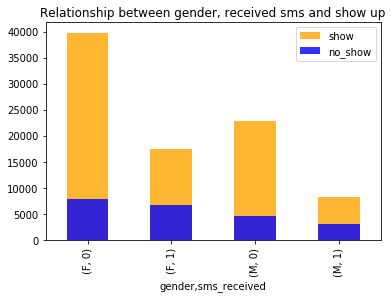

In [242]:
# View the histogram of the relationship between gender, sms_received and showed up or not at the appointment
df_show.groupby('gender')['sms_received'].value_counts().plot(kind ='bar', alpha=0.8, color='orange', label='show')
df_no_show.groupby('gender')['sms_received'].value_counts().plot(kind ='bar', alpha=0.8, color='blue', label='no_show')
plt.title('Relationship between gender, received sms and show up')
plt.legend();

In [243]:
# Calculate the proportion of no_showed or showed up patients who received messages.
mess = df.query('sms_received == 1')
fe_mess = mess.query('gender == "F"')
s_fe_mess = fe_mess.query('no_show == "No"')
s_fe_mess_pro = s_fe_mess['no_show'].count()/mess['no_show'].count()

no_s_fe_mess = fe_mess.query('no_show == "Yes"')
no_s_fe_mess_pro = no_s_fe_mess['no_show'].count()/mess['no_show'].count()

ma_mess = mess.query('gender == "M"')
s_ma_mess = ma_mess.query('no_show == "No"')
s_ma_mess_pro = s_ma_mess['no_show'].count()/mess['no_show'].count()

no_s_ma_mess = ma_mess.query('no_show == "Yes"')
no_s_ma_mess_pro = no_s_ma_mess['no_show'].count()/mess['no_show'].count()




In [244]:
# Calculate the proportion of no_showed or showed up patients who didn't receive messages.
no_mess = df.query('sms_received == 0')
fe_no_mess = no_mess.query('gender == "F"')
s_fe_no_mess = fe_no_mess.query('no_show == "No"')
s_fe_no_mess_pro = s_fe_no_mess['no_show'].count()/no_mess['no_show'].count()

no_s_fe_no_mess = fe_no_mess.query('no_show == "Yes"')
no_s_fe_no_mess_pro = no_s_fe_no_mess['no_show'].count()/no_mess['no_show'].count()

ma_no_mess = no_mess.query('gender == "M"')
s_ma_no_mess = ma_no_mess.query('no_show == "No"')
s_ma_no_mess_pro = s_ma_no_mess['no_show'].count()/no_mess['no_show'].count()

no_s_ma_no_mess = ma_no_mess.query('no_show == "Yes"')
no_s_ma_no_mess_pro = no_s_ma_no_mess['no_show'].count()/no_mess['no_show'].count()

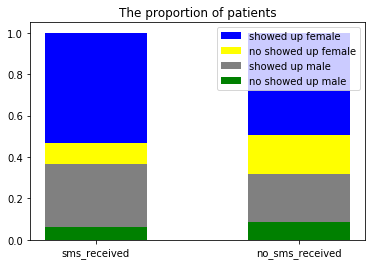

In [245]:
sms = ['sms_received', 'no_sms_received']
greens = np.array([no_s_ma_no_mess_pro, no_s_ma_mess_pro])
grays = np.array([s_ma_no_mess_pro, s_ma_mess_pro])
yellows = np.array([no_s_fe_no_mess_pro, no_s_fe_mess_pro])
blues = np.array([s_fe_no_mess_pro, s_fe_mess_pro])
ind = [x for x, _ in enumerate(sms)]

plt.bar(ind, blues, width=0.5, label='showed up female', color='blue', bottom=golds+silvers+bronzes)
plt.bar(ind, yellows, width=0.5, label='no showed up female', color='yellow', bottom=silvers+bronzes)
plt.bar(ind, grays, width=0.5, label='showed up male', color='gray', bottom=bronzes)
plt.bar(ind, greens, width=0.5, label='no showed up male', color='green')
plt.xticks(ind, sms)
plt.title("The proportion of patients")
plt.legend();


## Conclusions

There are more female patients than male patients at the survey.

Research Question 1: 

There are more female show up at the appointment than male does.

There are more female doesn't show up at the appointment than male doesn't.

The proportion of no_show female and male most likely are the same.

So we can realize that the different gender is not associated with showing or not at the appointment.

Research Question 2: 

Among 110,526 of patients make the appointment, there are 88,207 patients show up. So the number of show up patients is larger than the number of no_show up patients.

The mean age of showed up patients is 38 and the more of showed up patients is from 18 to 59 years old, and those are groups of adults(45.4%) and young adults(26.5%).

So the most group of showed up patient is adults group(45.4%).

Research Question 3:

There are less diabetes woman show up at the appointment than no_diabetes woman does.

There are less diabetes man show up at the appointment than no_diabetes man does.

So we can see that diabetes is not associated with showing or not at the appointment.

Research Question 4:

There are more alcoholism male than alcoholism female.

Among the group of showed up patients, the proportion of none alcohol female is largest(63.9%) and the smallest is the proportion of alcohol female (1%).

Among the group of no showed up patients, the proportion of none alcohol female is largest(64%) and the smallest is the proportion of alcohol female (1.4%).

So we can realize that the different gender and alcoholism are not associated with showing or not at the appointment.


Research Question 5:

We can realize that in the sms_received patients group,  the number of showed up female is larger than the number of no showed up female.

The number of show up female is also larger than the number of no showed up female in the group who didn't receive sms.

And it is the same for male.

So receiving sms or not is not the reason for showing or not at the appointment.


In [246]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0